In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
#import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Read Diabetes CSV File

In [2]:
csv_diabetes_data = pd.read_csv(r"C:\Learning\Data\diabetes.csv")
csv_diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


#### Missing values check

In [3]:
pd.isnull(csv_diabetes_data).any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#### Column & Datatype Details

In [4]:
csv_diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
csv_diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


#### Target(Output) variable's different category

In [6]:
csv_diabetes_data.groupby("Outcome").size()

Outcome
0    1316
1     684
dtype: int64

#### Correlation of all the columns in diabetes data

In [7]:
csv_diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


#### Setting up input variables in X by removing the target variable Outcome

In [8]:
X = csv_diabetes_data.drop(["Outcome"],1)

#### Setting up targe variable in y

In [9]:
y = csv_diabetes_data["Outcome"]

#### Split the training data and testing data as 75:25 ratio

In [10]:
x_train, x_test,y_train,y_test = train_test_split(X,y,train_size=75/100,random_state = 40)

#### No. of Training data

In [11]:
y_train.shape

(1500,)

#### No. of Testing data

In [12]:
y_test.shape

(500,)

In [13]:
#### Building the Logistic Regression Model

In [14]:
lrm = LogisticRegression(random_state=40)
lrm.fit(x_train,y_train)
y_pred=lrm.predict(x_test)

LogisticRegression(random_state=40)

#### Performance of the Model

In [15]:
# Accuracy score of the Model
print("Accuracy score of the Model",metrics.accuracy_score(y_test,y_pred))

Accuracy score of the Model 0.758


In [16]:
# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None,digits=2))

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       332
           1       0.71      0.47      0.57       168

    accuracy                           0.76       500
   macro avg       0.74      0.69      0.70       500
weighted avg       0.75      0.76      0.74       500



In [17]:
# ROC AUC Score
print("ROC AUC Score")
print(metrics.roc_auc_score(y_test,y_pred))

ROC AUC Score
0.6869262765347104


In [18]:
### Cross Validation
res = cross_val_score(lrm, x_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.7707
Accuracy SD: 		 0.0294


#### Confusion Matrix

<AxesSubplot:>

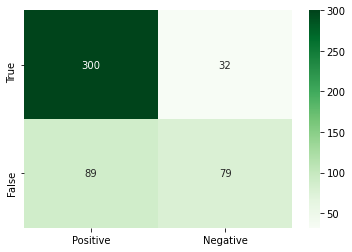

In [19]:
cfm = metrics.confusion_matrix(y_test,y_pred)
xlabel = ["Positive","Negative"]
ylabel = ["True","False"]
sns.heatmap(cfm,annot=True,cmap="Greens",fmt='d',xticklabels=xlabel,yticklabels=ylabel)
plt.show()